In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/Social_Network_Ads.csv')

# checking the shape of the data
dataset.shape

(400, 5)

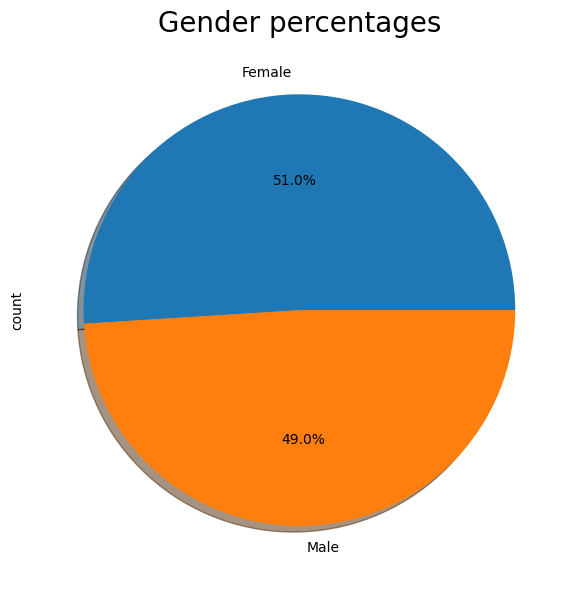

In [ ]:
dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

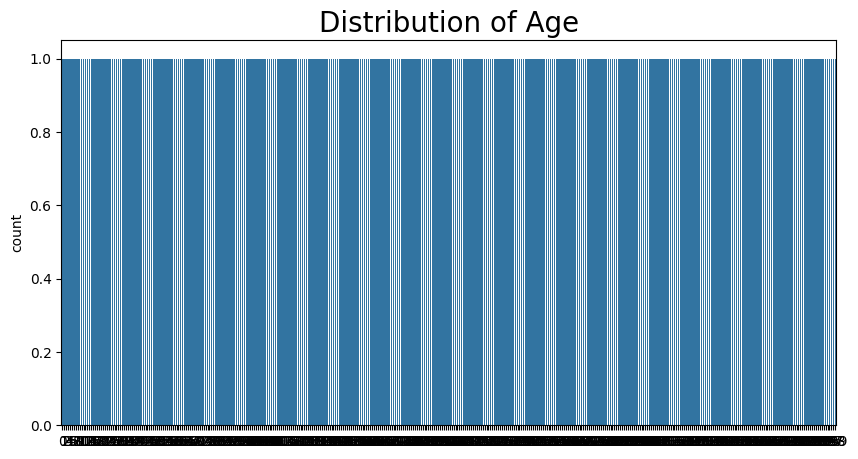

In [ ]:
# checking the age of people

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Salary amongst the Customers')

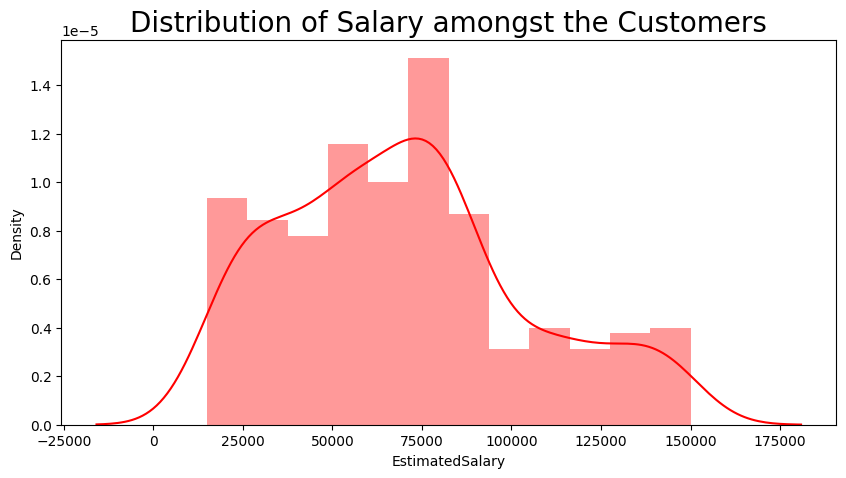

In [ ]:
# distribution of salary amongst the customers

plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(dataset['EstimatedSalary'], color = 'red')
plt.title('Distribution of Salary amongst the Customers', fontsize = 20)

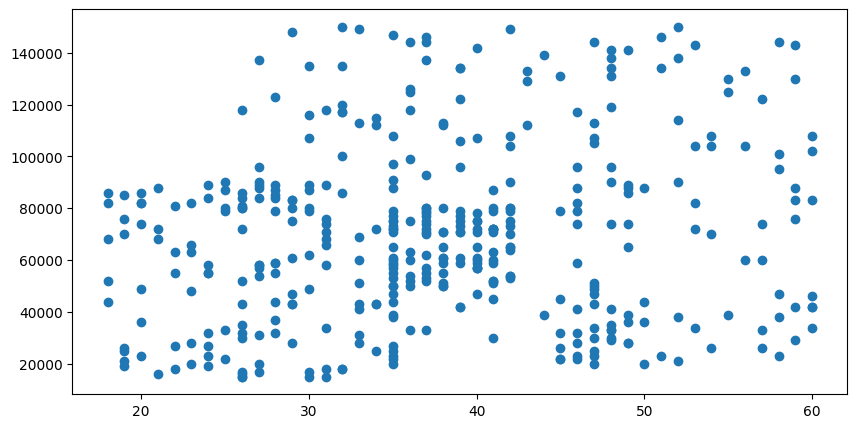

In [ ]:
# plotting a scatter plot for age and purchased

plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(dataset['Age'], dataset['EstimatedSalary'])
plt.show()

<Axes: xlabel='Purchased'>

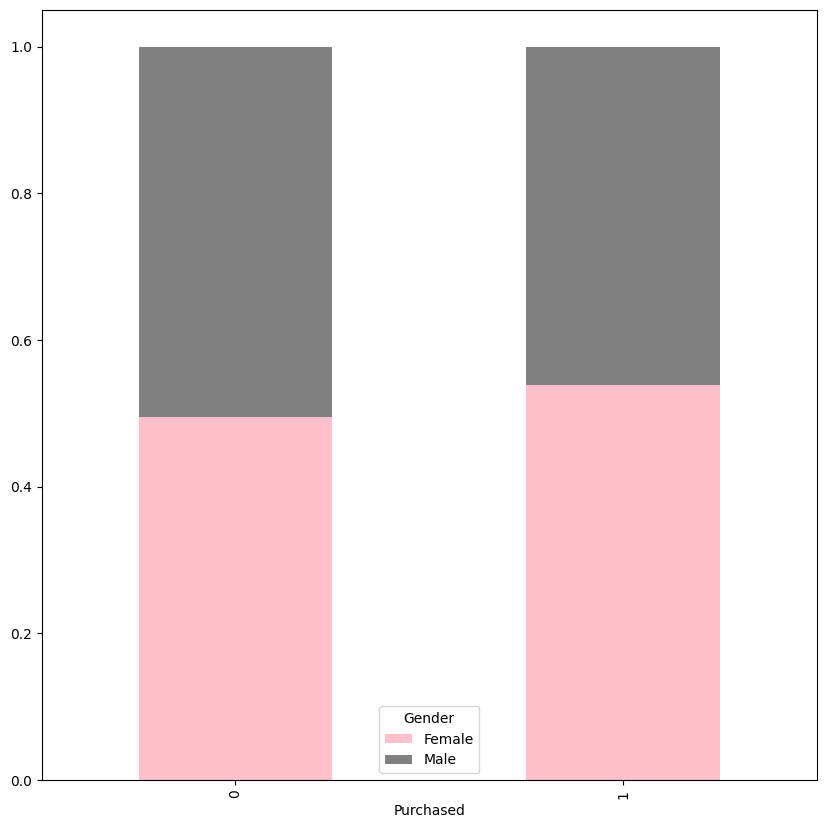

In [ ]:
# column chart for looking at the relation of gender in purchased

data = pd.crosstab(dataset['Purchased'], dataset['Gender'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 10), color = ['pink', 'grey'])

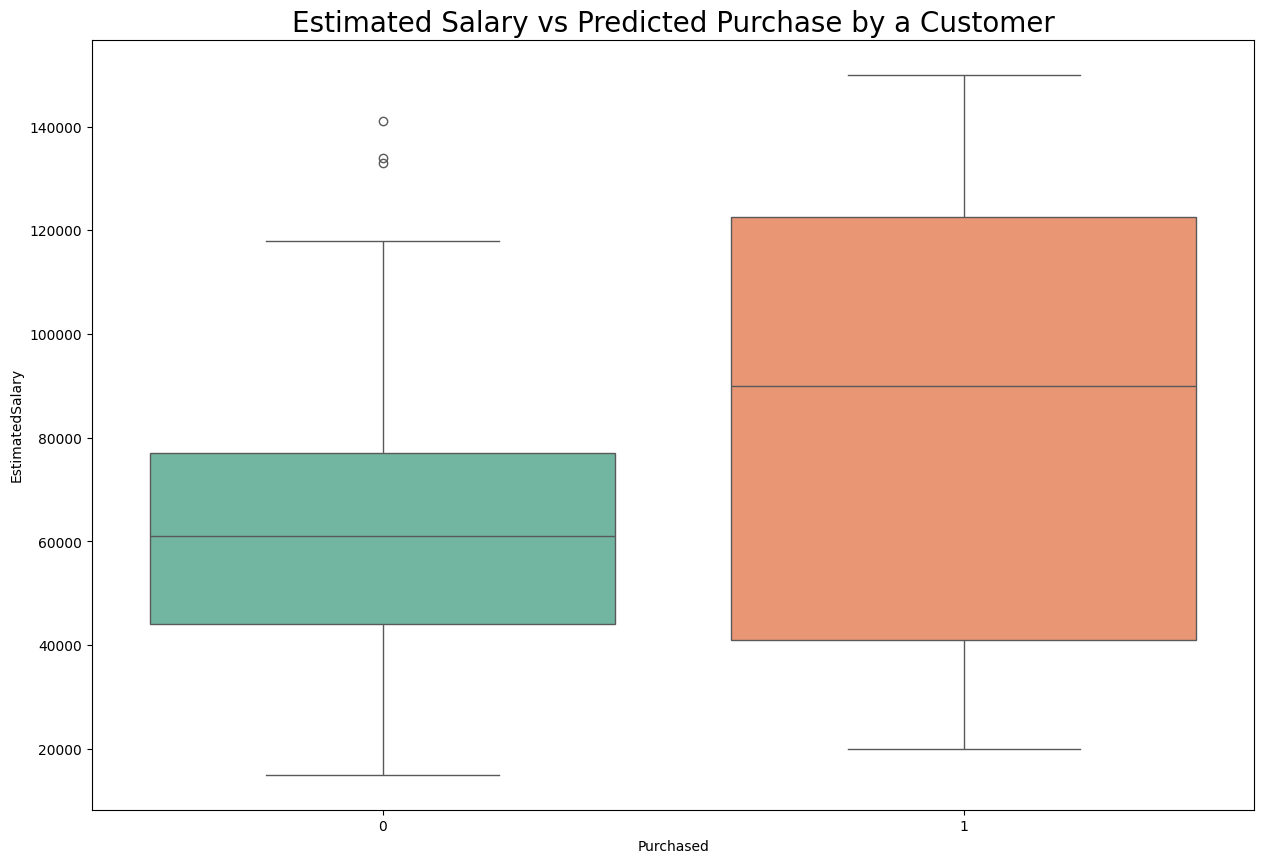

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size
plt.rcParams['figure.figsize'] = (15, 10)

# Create the box plot
sns.boxplot(x=dataset['Purchased'], y=dataset['EstimatedSalary'], palette='Set2')

# Add title
plt.title('Estimated Salary vs Predicted Purchase by a Customer', fontsize=20)

# Show the plot
plt.show()


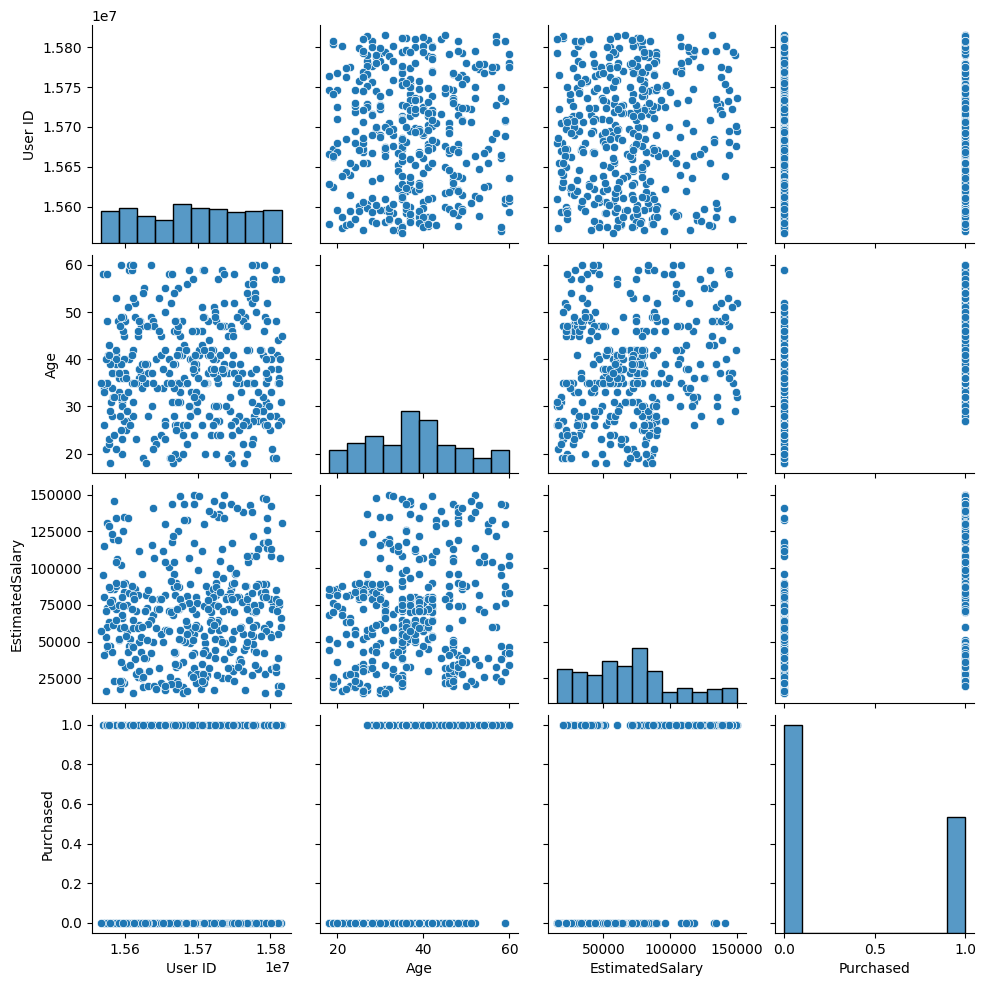

In [ ]:
# plotting a pairplot for the data

sns.pairplot(dataset)

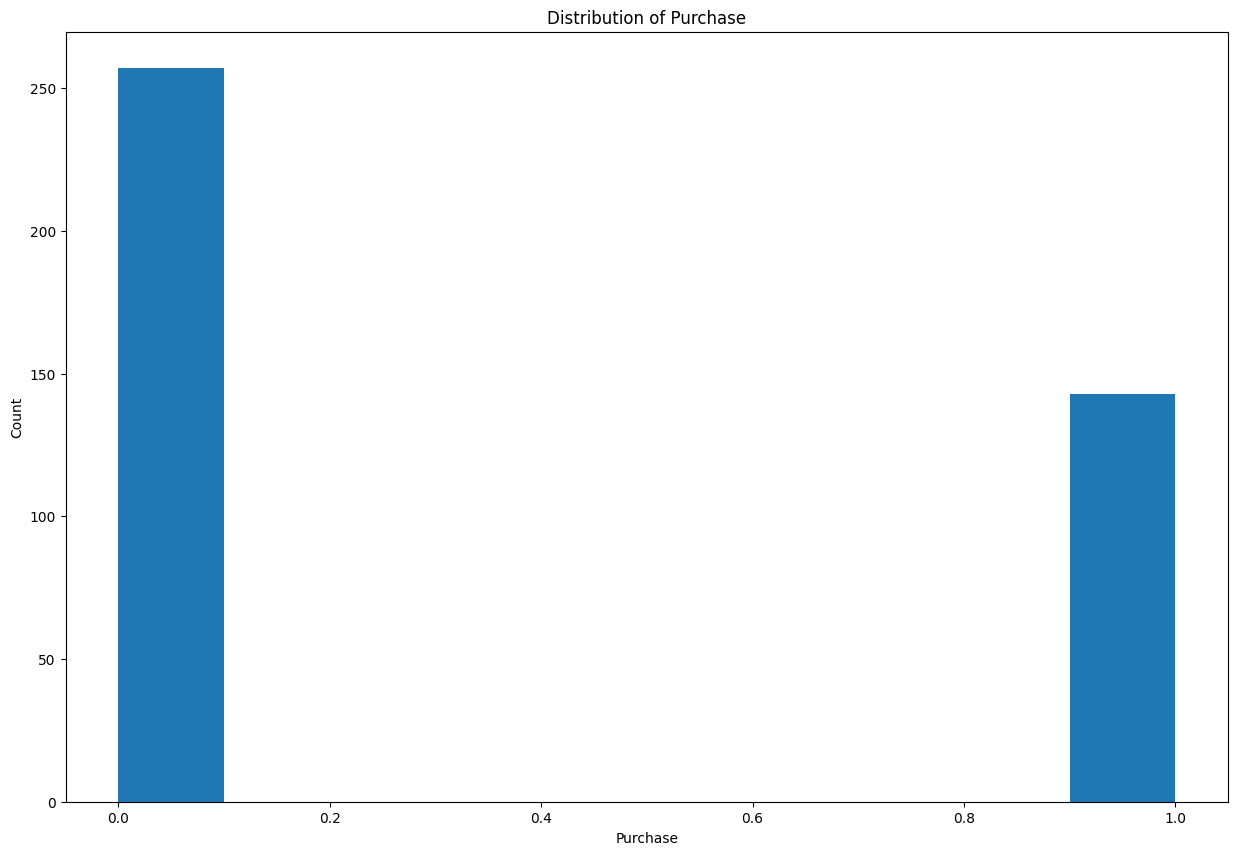

In [ ]:
plt.hist(x="Purchased", data=dataset);
plt.title('Distribution of Purchase');
plt.ylabel('Count');
plt.xlabel('Purchase');

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

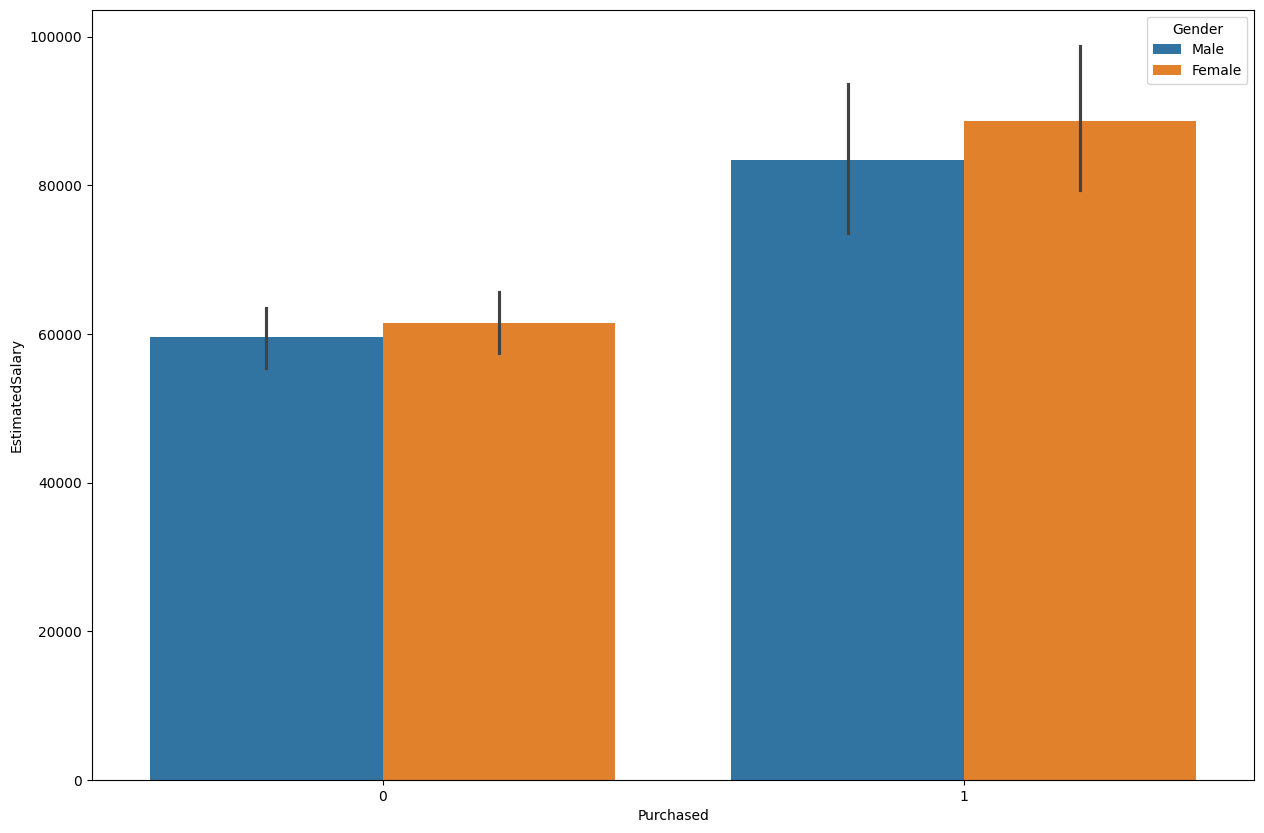

In [ ]:
sns.barplot(x="Purchased", y="EstimatedSalary",hue='Gender', data=dataset)

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

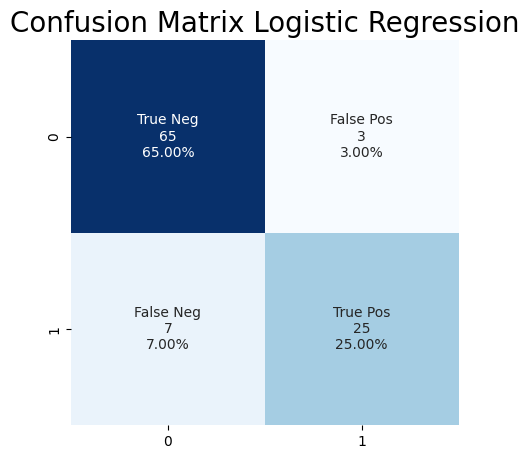

In [ ]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues', cbar = False)
plt.gcf().set_size_inches(5, 5)
plt.title('Confusion Matrix Logistic Regression', fontsize = 20)
plt.show()

In [ ]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    return clf, accuracy
model_list = []
score_list = []

model2 = RandomForestClassifier(random_state=5)
model2.fit(X_train, y_train)
score2 = accuracy_score(y_test, model2.predict(X_test))
print("Model : RandomForest Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score2))
model_list.append('RandomForestClassifier')
score_list.append(score2)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model2.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model2.predict(X_test))))

Model : RandomForest Classifier
Accuracy : 0.94
Recall_Score : 0.94
precission_Score : 0.88


In [ ]:
model5 = SVC(kernel = 'rbf',  random_state = 2)
model5.fit(X_train, y_train)
score5 = accuracy_score(y_test, model5.predict(X_test))
print("Model : Support vector Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('Support vectorClassifier')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model5.predict(X_test))))
print('=====================================')
print('precision_Score : {:0.2f}'.format(precision_score(y_test, model5.predict(X_test))))

Model : Support vector Classifier
Accuracy : 0.93
Recall_Score : 0.91
precision_Score : 0.88


In [ ]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
score6 = accuracy_score(y_test, model6.predict(X_test))
print("Model : GaussianNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('GaussianNB')
score_list.append(score6)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model6.predict(X_test))))
print('=====================================')
print('precision_Score : {:0.2f}'.format(precision_score(y_test, model6.predict(X_test))))

Model : GaussianNB
Accuracy : 0.90
Recall_Score : 0.78
precision_Score : 0.89


In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
score1 = accuracy_score(y_test, model1.predict(X_test))
print("Model : Logistics Regression")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score1))
model_list.append('Logistic_Regression')
score_list.append(score1)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model1.predict(X_test))))
print('=====================================')
print('precision_Score : {:0.2f}'.format(precision_score(y_test, model1.predict(X_test))))

Model : Logistics Regression
Accuracy : 0.89
Recall_Score : 0.75
precision_Score : 0.89


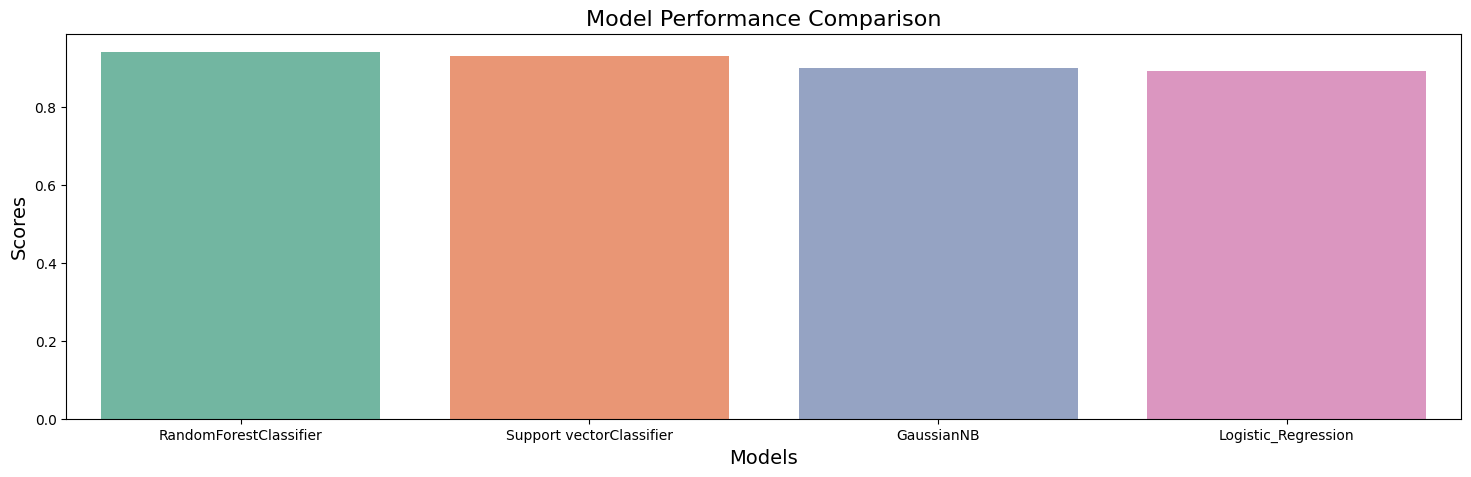

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure model_list and score_list are defined as lists
# Example:
# model_list = ['Model A', 'Model B', 'Model C']
# score_list = [0.85, 0.90, 0.78]

# Set the figure size
plt.figure(figsize=(18, 5))

# Create the bar plot
sns.barplot(x=model_list, y=score_list, palette='Set2')

# Add title and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)

# Show the plot
plt.show()


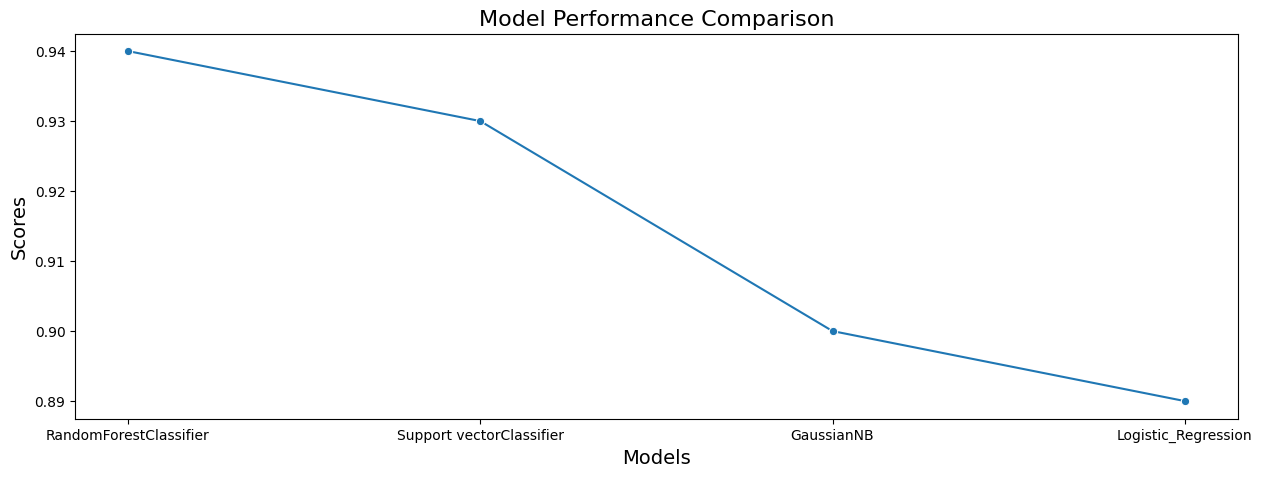

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure model_list and score_list are defined as lists
# Example:
# model_list = ['Model A', 'Model B', 'Model C']
# score_list = [0.85, 0.90, 0.78]

# Set the figure size
plt.figure(figsize=(15, 5))

# Create the line plot
sns.lineplot(x=model_list, y=score_list, marker='o')

# Add title and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)

# Show the plot
plt.show()
